In [16]:
from keras.callbacks import History
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(Dropout(0.3))
# Step 2 - Pooling
#Pooling is not mandatory.It depends on the architectures.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer


# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(512,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Compiling the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'D:/parent/train',
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical')

testing_set = test_datagen.flow_from_directory('D:/parent/valid',
                                            target_size=(64, 64),
                                            batch_size=8,
                                            class_mode='categorical')

history = model.fit_generator(training_set,steps_per_epoch=300,epochs=30,validation_data=testing_set,validation_steps=100)

model.save('cnnmodel.h5')

Found 310 images belonging to 5 classes.
Found 76 images belonging to 5 classes.
Epoch 1/30
300/300 [==============================] - 148s 494ms/step - loss: 1.3610 - accuracy: 0.3986 - val_loss: 1.5770 - val_accuracy: 0.3684
Epoch 2/30
300/300 [==============================] - 149s 498ms/step - loss: 0.2304 - accuracy: 0.9274 - val_loss: 5.0768 - val_accuracy: 0.3421
Epoch 3/30
188/300 [=================>............] - ETA: 51s - loss: 0.1800 - accuracy: 0.9585

KeyboardInterrupt: 

In [2]:
history.history

{'val_loss': [0.9734985828399658, 0.4976038932800293, 2.0223476886749268],
 'val_accuracy': [0.3607594966888428, 0.4757281541824341, 0.4778481125831604],
 'loss': [1.1861859437823297, 0.09964886076398216, 0.041508757281876946],
 'accuracy': [0.5025, 0.9716667, 0.9925]}

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 58, 58, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

c:\users\asif\anaconda3\envs\tensor_experiment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\asif\anaconda3\envs\tensor_experiment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


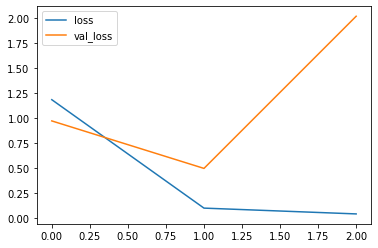

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.lineplot(np.arange(3),history.history['loss'],label='loss')
sns.lineplot(np.arange(3),history.history['val_loss'],label='val_loss')
plt.show()

In [12]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
test_image = image.load_img('C:/Users/Asif/OneDrive/Desktop/images (2).jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
model = load_model('cnnmodel.h5')
result = model.predict(test_image)
print(training_set.class_indices)
if result[0][0]==1:
    prediction='cat'
    print(prediction)
elif result[0][1]==1:
    prediction='dog'
    print(prediction)
elif result[0][2]==1:
    prediction='giraffe'
    print(prediction)
elif result[0][3]==1:
    prediction='lion'
    print(prediction)
elif result[0][4]==1:
    prediction='tiger'
    print(prediction)
else:
    prediction='unknown'
    print(prediction)

{'cat': 0, 'dog': 1, 'giraffe': 2, 'lion': 3, 'tiger': 4}
giraffe


In [33]:
pip install h5py==2.10.0 --force-reinstall

  Using cached h5py-2.10.0-cp36-cp36m-win_amd64.whl (2.4 MB)
  Using cached numpy-1.19.5-cp36-cp36m-win_amd64.whl (13.2 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)

  Attempting uninstall: six
    Found existing installation: six 1.16.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\asif\\anaconda3\\envs\\tensor_experiment\\lib\\site-packages\\~umpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


c:\users\asif\anaconda3\envs\tensor_experiment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\asif\anaconda3\envs\tensor_experiment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\asif\anaconda3\envs\tensor_experiment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

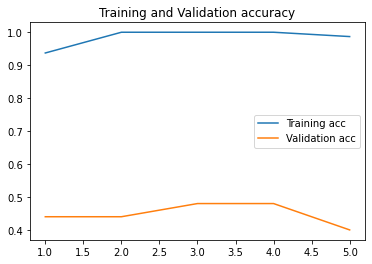

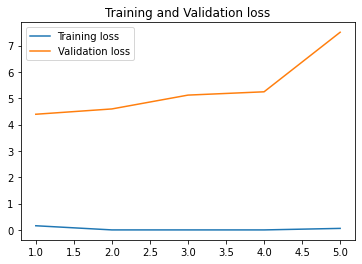

In [32]:
#Training and validation loss
from keras.callbacks import History
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, len(acc) + 1)
sns.lineplot(epochs,acc,label='Training acc')
sns.lineplot(epochs,val_acc,label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
         
sns.lineplot(epochs,loss,label='Training loss')
sns.lineplot(epochs,val_loss,label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [3]:
#training_set.class_indices

In [7]:
training_set.class_indices

{'cat': 0, 'dog': 1}

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.
c:\users\asif\anaconda3\envs\dogcat_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\asif\anaconda3\envs\dogcat_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\asif\anaconda3\envs\dogcat_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\asif\anaconda3\envs\dog

In [104]:
import numpy as np
firstconv=np.load('FirstConv.npy')

In [106]:
firstconv.shape

(3, 3, 3, 32)

In [135]:
firstconv[0][0]

array([[-0.06296946,  0.04682603, -0.04474601,  0.05103534, -0.03437537,
         0.00343938, -0.08481383,  0.05463146, -0.04084112, -0.10391648,
        -0.08105874, -0.07112854,  0.0584477 ,  0.09233233, -0.09049938,
        -0.00775937,  0.0181609 , -0.01154556, -0.02688677, -0.14387123,
         0.05531074,  0.00731299,  0.10575003,  0.11364988, -0.03431324,
        -0.1256626 , -0.06242098,  0.04452371, -0.09085798, -0.00836455,
        -0.02702807, -0.11044082],
       [ 0.05142853,  0.1157781 , -0.10180988, -0.01135574, -0.09845041,
         0.06933088, -0.0320311 , -0.05922292, -0.05231328,  0.11537535,
         0.1325972 ,  0.11718772, -0.05182618, -0.02140267,  0.00926215,
        -0.09780077, -0.01877626,  0.0595016 ,  0.01124072, -0.13084863,
        -0.11093123,  0.03236044,  0.12682405, -0.07455211, -0.05959352,
        -0.10305691, -0.0211821 , -0.04914135,  0.08709821,  0.07651506,
        -0.11175516,  0.13368466],
       [ 0.06319377, -0.04547363,  0.05005315,  0.0911

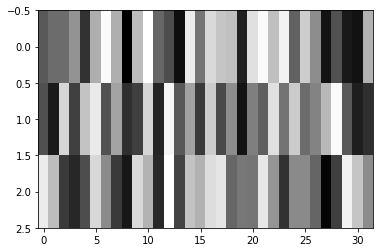

In [143]:
from matplotlib import pyplot as plt
plt.imshow(firstconv[0][1],cmap='gray',interpolation='nearest', aspect='auto')
plt.show()

In [170]:
#My first CNN
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,AveragePooling2D
from keras.callbacks import History

#Initializing the CNN
model=Sequential()

#Step 1 - Convolution

model.add(Conv2D(16 ,(3,3) ,input_shape=(64,64,3),activation='relu'))

model.add(Conv2D(16, (3,3),activation='relu'))

#Step 2- Pooling

model.add(AveragePooling2D(pool_size=(2,2)))


#Step 3 - Attach it to Fully Connected Layers

model.add(Flatten())

#Adding A Hidden Layer
model.add(Dense(64,activation='relu'))

#Adding the Output layer(multi-class classification so we are using activation function='softmax')

model.add(Dense(5,activation='softmax'))

training_set = train_datagen.flow_from_directory(
    'D:\parent',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory('D:\parent',
                                            target_size=(64, 64),
                                            batch_size=64,
                                            class_mode='categorical')

history = model.fit_generator(training_set,
                                 steps_per_epoch=150,epochs=2,
                                 validation_data=test_set,
                                 validation_steps=100)

model.save('new.h5')

Found 67 images belonging to 5 classes.
Found 67 images belonging to 5 classes.
Epoch 1/2
200/200 [==============================] - 128s 638ms/step - loss: 0.2836 - accuracy: 0.9091 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 2/2
200/200 [==============================] - 126s 631ms/step - loss: 7.9614e-04 - accuracy: 1.0000 - val_loss: 4.5272e-04 - val_accuracy: 1.0000


In [174]:
%%time
#import numpy as np
#from keras.preprocessing import image
#from keras.models import load_model
test_image=image.load_img('D:/parent/tiger/11.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
model=load_model('dl.h5')
results=model.predict(test_image)

if results[0][0]==1:
    prediction='cat'
    print(prediction)
elif results[0][1]==1:
    prediction='dog'
    print(prediction)
elif results[0][2]==1:
    prediction='giraffe'
    print(prediction)
elif results[0][3]==1:
    prediction='lion'
    print(prediction)
elif results[0][4]==1:
    prediction='tiger'
    print(prediction)
else:
    prediction='unknown'
    print(prediction)

tiger
Wall time: 16.5 s


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 3)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(5, activation='softmax'))


model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

train_datagen_1=ImageDataGenerator(rescale=1./255)
test_datagen_1=ImageDataGenerator(rescale=1./255)
training_set = train_datagen_1.flow_from_directory(
    'D:\parent',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical')

test_set = test_datagen_1.flow_from_directory('D:\parent',
                                            target_size=(28, 28),
                                            batch_size=64,
                                            class_mode='categorical')

history = model.fit_generator(training_set,
                                 steps_per_epoch=400,epochs=2,
                                 validation_data=test_set,
                                 validation_steps=100)

model.save('new.h5')

Found 67 images belonging to 5 classes.
Found 67 images belonging to 5 classes.
Epoch 1/2
400/400 [==============================] - 185s 463ms/step - loss: 0.3578 - accuracy: 0.8715 - val_loss: 8.3504e-04 - val_accuracy: 1.0000
Epoch 2/2
400/400 [==============================] - 185s 462ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.8176e-04 - val_accuracy: 1.0000


In [13]:
%%time
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
test_image=image.load_img('D:/parent/cat/11.jpg',target_size=(28,28))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
model=load_model('new.h5')
results=model.predict(test_image)
if results[0][0]==1:
    prediction='cat'
    print(prediction)
elif results[0][1]==1:
    prediction='dog'
    print(prediction)
elif results[0][2]==1:
    prediction='giraffe'
    print(prediction)
elif results[0][3]==1:
    prediction='lion'
    print(prediction)
elif results[0][4]==1:
    prediction='tiger'
    print(prediction)
else:
    prediction='unknown'
    print(prediction)

cat
Wall time: 3.04 s
